In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

np.random.seed(42)

In [8]:
digits = load_digits()

In [9]:
print( digits["DESCR"] )

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [10]:
data = scale( digits.data )

In [11]:
n_samples, n_features = data.shape

In [12]:
from matplotlib.pyplot import imshow

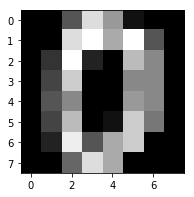

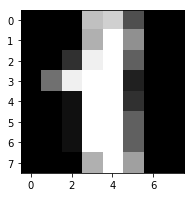

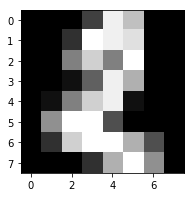

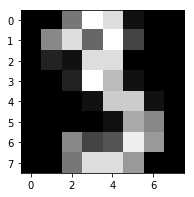

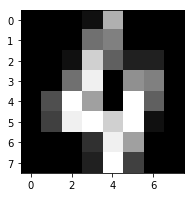

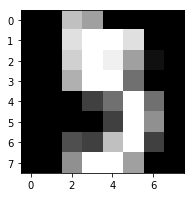

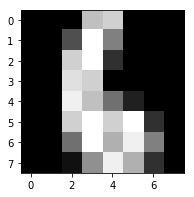

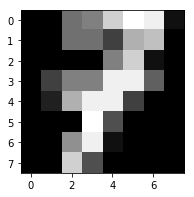

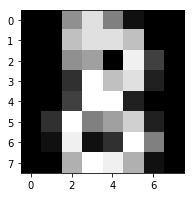

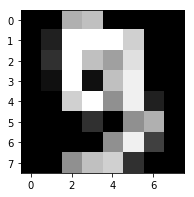

In [13]:
for i in range(10):
    plt.figure(1, figsize=(3,3))
    plt.imshow( digits.images[i], cmap=plt.cm.gray, interpolation="nearest" )
    plt.show()

In [14]:
def plot_data( reduced_data ):
    x_min, x_max = reduced_data[:,0].min() - 1, reduced_data[:,0].max() + 1
    y_min, y_max = reduced_data[:,1].min() - 1, reduced_data[:,1].max() + 1
    
    plt.figure(1)
    plt.clf()
    
    plt.plot( reduced_data[:,0], reduced_data[:,1], 'k.', markersize=2 )
    
    plt.title("Reduced data")
    
    plt.xlim( x_min, x_max )
    plt.ylim( y_min, y_max )
    plt.xticks(())
    plt.yticks(())
    
    plt.show()

In [15]:
def plot_kmeans( reduced_data, kmeans ):
    x_min, x_max = reduced_data[:,0].min() - 1, reduced_data[:,0].max() + 1
    y_min, y_max = reduced_data[:,1].min() - 1, reduced_data[:,1].max() + 1
    xx,yy = np.meshgrid( np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02) )
    
    Z = kmeans.predict( np.c_[xx.ravel(),yy.ravel()] ).reshape(xx.shape)

    plt.figure(1)
    plt.clf()
    
    plt.imshow(Z, interpolation="nearest",
              extent=( xx.min(),xx.max(), yy.min(), yy.max() ),
              cmap = plt.cm.Paired,
              aspect="auto", origin="lower" )
    
    plt.plot( reduced_data[:,0], reduced_data[:,1], 'k.', markersize=2 )
    
    centroids = kmeans.cluster_centers_
    plt.scatter( centroids[:,0], centroids[:,1],
               marker="x", linewidth=3, color="w", zorder=10)
    
    plt.title("Reduced data")
    
    plt.xlim( x_min, x_max )
    plt.ylim( y_min, y_max )
    plt.xticks(())
    plt.yticks(())
    
    plt.show()

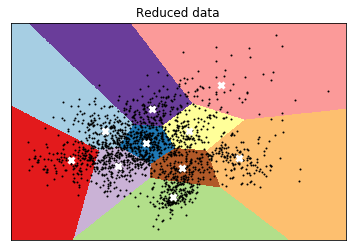

In [21]:
from sklearn.decomposition import PCA

reduced_data = PCA( n_components=2 ).fit_transform( data )
kmeans = KMeans( n_clusters = 10 )
kmeans.fit( reduced_data )

plot_kmeans( reduced_data, kmeans )


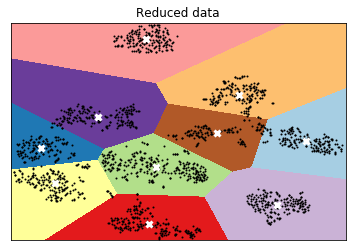

In [22]:
from sklearn.manifold import TSNE
reduced_data = TSNE(n_components=2, random_state=0).fit_transform( data )
kmeans = KMeans( n_clusters = 10 )
kmeans.fit( reduced_data )
plot_kmeans( reduced_data, kmeans )

In [35]:
data[0]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])